In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.datasets import load_boston

get the boston house dataset

In [3]:
boston_dataset = load_boston()

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# add the target
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
np.random.seed(29)

In [12]:
n = 200

In [13]:
x = np.random.randn(n)

In [14]:
x

array([-0.41748213,  0.7060321 ,  1.9159847 , -2.1417555 ,  0.71905689,
        0.46707262,  0.76672253,  0.88200945,  0.80875066, -0.94716485,
       -0.12903843, -0.63086044, -1.43842284,  0.65220495,  0.98494561,
       -1.1444064 ,  0.38683645,  0.4265849 ,  2.10646128, -0.19786553,
       -0.2484003 ,  1.71381789, -0.27356624,  1.34747596,  0.34321934,
       -0.89567509,  2.11825131, -0.28609779,  0.24322882, -0.61897527,
        1.63784998, -0.05811961, -1.83694028, -0.7785032 ,  0.83320023,
       -0.04428776,  0.55439513, -0.4084749 , -0.46409435,  0.41800894,
        0.57453712, -1.74668412,  1.38228917, -1.26331079, -0.25736174,
       -0.96723108, -1.20666907,  2.66861402, -2.47113964,  0.07261643,
       -0.40761335, -1.14510085, -2.32342938,  0.08442342,  0.71087449,
        0.82788128, -1.59302662, -0.5079899 ,  2.55114425, -1.68596461,
       -0.47842946,  1.17949062, -0.00697292,  0.98764392,  0.22076528,
       -0.06161137, -1.03826422, -0.29860915,  0.37449239,  0.84

In [15]:
y = x * 10 + np.random.randn(n) * 2

In [16]:
y

array([-1.27156123e+00,  7.99059976e+00,  1.98486874e+01, -2.19289028e+01,
        5.57906972e+00,  3.71332303e+00,  5.52974425e+00,  5.69849836e+00,
        6.06961687e+00, -1.06978171e+01, -6.19183571e+00, -3.92516137e+00,
       -1.62849879e+01,  3.84159425e+00,  9.53395418e+00, -1.09399832e+01,
        5.30903568e+00,  5.51747996e+00,  2.15019040e+01, -4.55230737e+00,
       -5.33143408e+00,  1.67750657e+01, -3.70040475e+00,  1.47716230e+01,
        5.63108835e-01, -7.08489586e+00,  2.09775494e+01, -5.90283157e+00,
        3.39900771e+00, -7.09370309e+00,  1.98256205e+01,  8.95849572e-01,
       -1.54599159e+01, -5.32469918e+00,  1.06904639e+01,  4.19909882e-02,
        3.66857372e+00, -3.19911994e+00, -2.85613119e+00,  9.45815207e-01,
        5.84119698e+00, -1.86440086e+01,  1.58219467e+01, -1.30782422e+01,
       -4.47367719e+00, -1.04413754e+01, -9.13030428e+00,  2.29949809e+01,
       -2.75758231e+01,  1.58979356e+00, -8.06613163e+00, -1.09266183e+01,
       -2.24482209e+01,  

In [17]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


Text(0.5, 6.79999999999999, 'Independent variable')

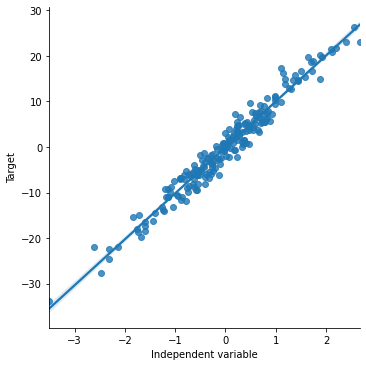

In [18]:
sns.lmplot(x="x", y="y", data=data, order=1)

plt.ylabel('Target')
plt.xlabel('Independent variable')

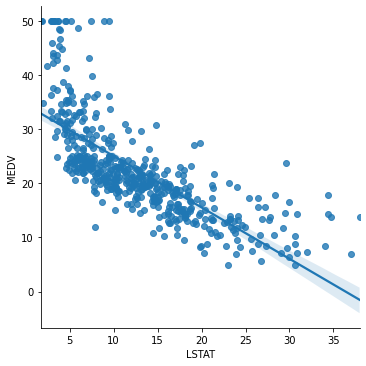

In [19]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

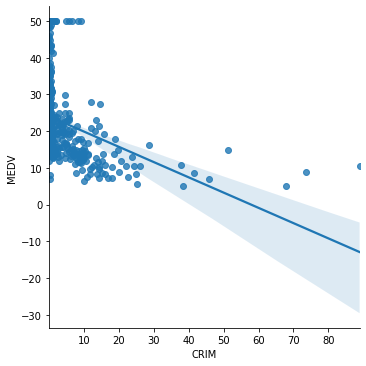

In [20]:
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

In [21]:
linreg = LinearRegression()


In [22]:
# fit the model
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred = linreg.predict(data['x'].to_frame())

In [24]:
pred

array([ -4.31267193,   7.02628565,  19.23761417, -21.71473253,
         7.15773711,   4.61461042,   7.63879794,   8.80231985,
         8.06296271,  -9.65844307,  -1.40158213,  -6.46617171,
       -14.61641634,   6.48304039,   9.841193  , -11.64908421,
         3.80483473,   4.20599206,  21.15998039,  -2.09621288,
        -2.60623008,  17.19726539,  -2.86021486,  13.4999952 ,
         3.36463337,  -9.13878771,  21.27897014,  -2.98668838,
         2.35548874,  -6.34622178,  16.43056662,  -0.68584082,
       -18.63841468,  -7.95624181,   8.30971761,  -0.54624427,
         5.49590438,  -4.22176734,  -4.7831012 ,   4.11944012,
         5.69918543, -17.7275132 ,  13.85134415, -12.84911509,
        -2.69667259,  -9.8609596 , -12.27746413,  26.83345205,
       -25.03900989,   0.63359985,  -4.21307224, -11.65609283,
       -23.54825844,   0.75276076,   7.07515699,   8.25603666,
       -16.17673989,  -5.22611279,  25.64789991, -17.11470755,
        -4.92777698,  11.80461953,  -0.16964788,   9.86

In [25]:
error = data['y'] - pred

In [26]:
error

0      3.041111
1      0.964314
2      0.611073
3     -0.214170
4     -1.578667
         ...   
195   -0.495069
196    1.206319
197   -0.516651
198   -0.026771
199   -0.515181
Name: y, Length: 200, dtype: float64

Text(0, 0.5, 'Real value')

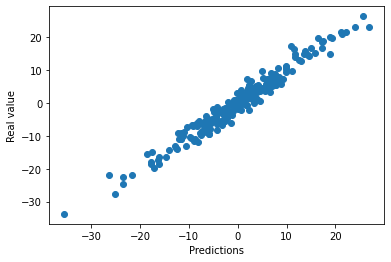

In [27]:
plt.scatter(x=pred, y=data['y'])
plt.xlabel('Predictions')
plt.ylabel('Real value')

Text(0.5, 0, 'Independent variable x')

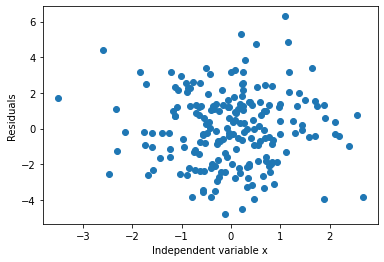

In [28]:
plt.scatter(y=error, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

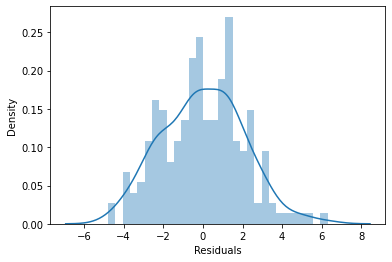

In [29]:
sns.distplot(error, bins=30)
plt.xlabel('Residuals')

In [30]:
# call the linear model from sklearn
linreg = LinearRegression()

In [31]:
# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

In [33]:
# calculate the residuals
error = boston['MEDV'] - pred

Text(0, 0.5, 'MEDV')

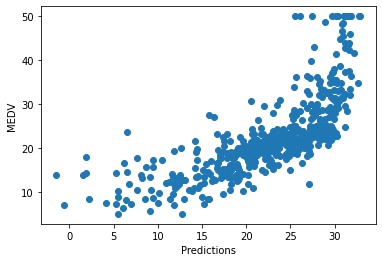

In [34]:
# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

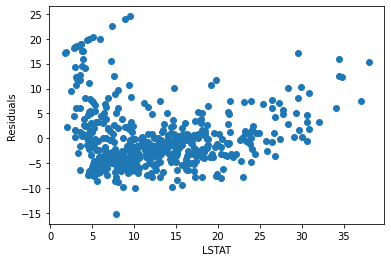

In [35]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


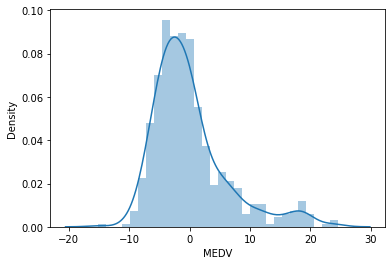

In [36]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)